# Computing a Best Fit Line

Penn State University provides a [very practical course in regression methods](https://onlinecourses.science.psu.edu/stat501/) along with simple, easy to use examples. I found this course to be a good refresher on regression, but it stopped at the point of going under the hood to execute the machine learning to find best fit lines. In this notebook, I demonstrate a few examples of the higher-level stats using Python/NumPy/SK/what have you. I then go a step further and walk through the machine learning aspects that make Python purr. 

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The cancer data set shows mortality rates by state for skin cancer victims, along with the center points for latitude and longitude of that state.

In [32]:
cancer = pd.read_table("skincancer.txt", delim_whitespace=True)

In [33]:
cancer.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


The NumPy `polyfit()` function computes a least squares polynomial for a given dataset, taking in x and y coordinates and returning a slope and y-intercept. We will soon demonstrate how to do this ourselves.

In [34]:
m_c, b_c = np.polyfit(cancer.Lat, cancer.Mort, 1)

A note for Matplotlib users who are taking advantage of the `%matplotlib inline` declaration: if you're going to overlay a line plot and a scatter plot like this, you have to put them in the same cell. Once `inline` does its thing, you can't overlay a new line on top.

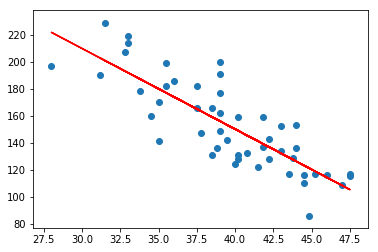

In [35]:
plt.plot(cancer.Lat, [m_c*x + b_c for x in cancer.Lat], "red")
plt.scatter(x=cancer.Lat, y=cancer.Mort)

Same effort as before, just with a new dataset showing the relationship between student height and student weight.

In [36]:
studentheight = pd.read_table("studentheight.txt", delim_whitespace=True)

In [37]:
studentheight.head()

,ht,wt
0,63,127
1,64,121
2,66,142
3,69,157
4,69,162


In [39]:
m_sh, b_sh = np.polyfit(studentheight.ht, studentheight.wt, 1)

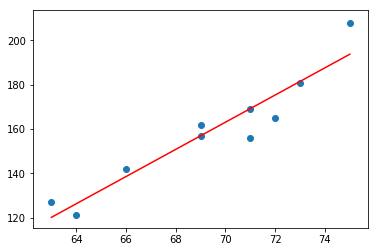

In [40]:
plt.plot(studentheight.ht, [m_sh*x + b_sh for x in studentheight.ht], "red")
plt.scatter(x=studentheight.ht, y=studentheight.wt)

## Least Squares

We can see that our red lines above don't align fully with the $x$ and $y$ values (if they did, we'd have a deterministic relationship rather than a statistical one). The difference between the predicted value ( $\hat{y}_i$ ) and the actual value ( $y_i$ ) is known as the error ( $e_i$ ). Our goal is to find the function such that the sum total of the errors ( $Q$ ) is minimized.

$$Q = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In order to find the minimum value of $Q$, we're going to use a technique known as [gradient descent.](https://en.wikipedia.org/wiki/Gradient_descent)

The core principles of gradient descent are reasonably simple, even if the execution can turn complex. We are going to try a potential line function, check it for its value of $Q$, then repeat this process for a $n$ number of different attempts until we have the lowest value of $Q$. Though human beings might balk at repeating a computation 10,000 times or 100,000 times, the computer has no issue with this.

We are going to call back to high school algebra and remember that the slope of a line is $m$ and the y-intercept of the line is $b$. Our line will be represented as $y = mx + b$.

In order to execute gradient descent, we first need to determine our error function - which we just did above, with $Q$. Now we need to represent that in code.

In [42]:
def compute_error(b, m, x_data, y_data):
    error = 0
    assert len(x_data) == len(y_data)
    for i, x in enumerate(x_data):
        error += (y_data[i] - (m * x + b)) ** 2
        
    return error